# Perkenalan 

## Nama : Dimas Furqon Prawimastoro

# Latar Belakang

Canadasalesdata.csv adalah suatu set data yang berisikan tentang penjualan mobil yang dihitung selama setahun, dari mulai tahun 2019 hingga tahun 2021. Dari data tersebut juga dipisahkan berdasarkan jenis merk mobil yang dipantau penjualannya per bulan. selain itu terdapat juga Kategori untuk jenis merk dari Mobil-mobil tersebut.

Adapun tujuan dari dataset ini adalah untuk melihat trend penjualan dari setiap jenis merk mobil yang bergerak setiap bulannya dalam rentang waktu 3 tahun, sehingga dari data tersebut dapat terlihat produk jenis merk mobil mana kah yang lebih unggul dari sisi penjualan dan dari sisi periode penjualan.

Dari data yang disajikan dapat diperoleh beberapa permasalahan yang akan ditelaah, antara lain : 
1. Analisis Total penjualan : digunakan untuk melihat agregasi total penjual berdasarkan merk
2. Analisis Trend : digunakan untuk melihat penjualan terbanyak maupun penjualan yang paling sedikit berdasarkan periode bulan atau tahun tertentu.
3. Analisis preferensi pengguna: digunakan untuk analisis untuk mengetahui preferensi pengguna terhadap merk mobil berdasarkan total penjualan
4. Analisis preferensi Kategori: digunakan untuk melihat preferensi terhadap kategori mobil
5. Analisis Kategori x Tahun : digunakan untuk melihat prefersi mobil pada tahun tertentu


# Penjelasan Kolom

# 1. Import Library dan Dataset

## 1.1. Import Library

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2. Import Dataset

In [209]:
data1 = pd.read_csv('Canadasalesdata.csv')

In [210]:
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


# 2. Data Checking

In [212]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Jan         236 non-null    int64 
 2   Feb         236 non-null    int64 
 3   Mar         236 non-null    int64 
 4   Apr         236 non-null    int64 
 5   May         236 non-null    int64 
 6   Jun         236 non-null    int64 
 7   Jul         236 non-null    int64 
 8   Aug         236 non-null    int64 
 9   Sep         236 non-null    int64 
 10  Oct         236 non-null    int64 
 11  Nov         236 non-null    int64 
 12  Dec         236 non-null    int64 
 13  Sumofsales  236 non-null    int64 
 14  Category    236 non-null    object
 15  Year        236 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 29.6+ KB


In [213]:
data1.isna().sum()

Model         0
Jan           0
Feb           0
Mar           0
Apr           0
May           0
Jun           0
Jul           0
Aug           0
Sep           0
Oct           0
Nov           0
Dec           0
Sumofsales    0
Category      0
Year          0
dtype: int64

Dapat terlihat bahwa tidak ada kolom yang memiliki 'missing values'

In [215]:
data1["Merek Mobil"]=data1["Model"].str.split().str[0]
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


In [216]:
data1["Merk"] = data1["Merek Mobil"]

In [217]:
data1["Merek Mobil"].unique()

array(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'Infiniti',
       'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz',
       'Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford',
       'GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen',
       'Buick', 'Dodge', 'Honda', 'Hyundai'], dtype=object)

In [218]:
data2 = data1.groupby("Merek Mobil").agg(
    total_penjualan = ("Sumofsales","sum"),
    total_jan = ("Jan","sum"),
    total_feb = ("Feb","sum"),
    total_mar = ("Mar","sum"),
    total_apr = ("Apr","sum"),
    total_may = ("May","sum"),
    total_jun = ("Jun","sum"),
    total_jul = ("Jul","sum"),
    total_aug = ("Aug","sum"),
    total_sep = ("Sep","sum"),
    total_oct = ("Oct","sum"),
    total_nov = ("Nov","sum"),
    total_dec = ("Dec","sum"),
    merk = ("Merk","max")
    ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis','Infiniti','Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz','Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford','GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen','Buick', 'Dodge', 'Honda', 'Hyundai'])

In [219]:
data2

,total_penjualan,total_jan,total_feb,total_mar,total_apr,total_may,total_jun,total_jul,total_aug,total_sep,total_oct,total_nov,total_dec,merk
Merek Mobil,,,,,,,,,,,,,,
Acura,6847,287,585,876,665,774,921,353,420,437,429,255,845,Acura
Audi,60929,4096,4228,4691,5994,6707,6081,4402,5077,5029,5023,5548,4053,Audi
BMW,29294,1924,3233,2851,3200,3015,3148,1674,1813,2373,2124,2029,1910,BMW
Cadillac,27867,2273,2593,2533,2636,3251,3415,2167,2315,1750,1655,1479,1800,Cadillac
Genesis,1259,108,106,160,154,146,168,121,0,0,0,20,276,Genesis
Infiniti,15058,1208,1293,1527,1229,1351,1334,1154,1166,1306,1201,1160,1129,Infiniti
Jaguar,3533,422,416,417,430,424,373,171,157,199,178,163,183,Jaguar
Land,21116,2009,2252,2541,1707,2026,2137,1180,1240,1352,1518,1419,1735,Land
Lexus,54280,3941,3968,4744,4980,5022,4749,5609,3515,4186,5676,4473,3417,Lexus


In [220]:
data2 = data2.sort_index(ascending = True)

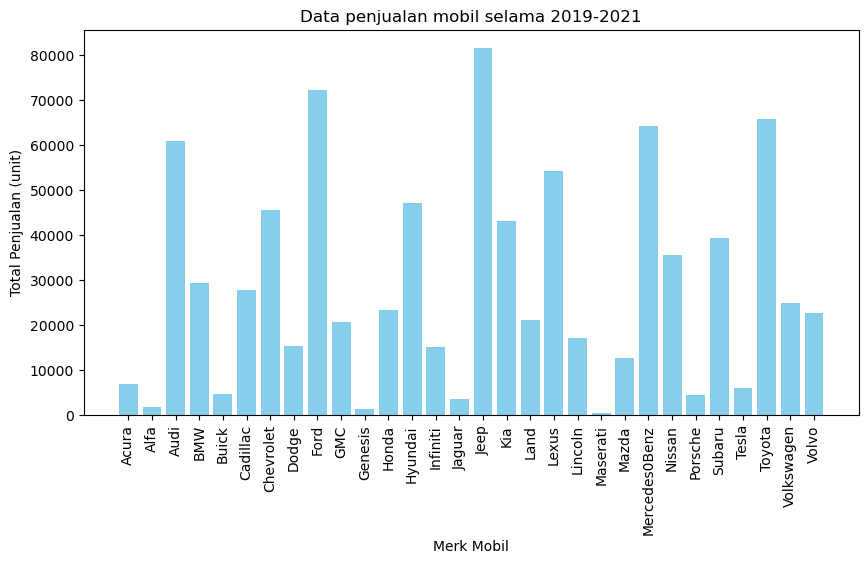

In [221]:
plt.figure(figsize=(10,5))
plt.bar(data2["merk"],data2["total_penjualan"],label="Total Penjualan Menurut Merk Mobil", color="skyblue")
plt.title("Data penjualan mobil selama 2019-2021")
plt.xlabel("Merk Mobil")
plt.ylabel("Total Penjualan (unit)")
plt.xticks(rotation ='vertical')
plt.show()

In [222]:
data2019 = data1[data1["Year"] == 2019]
data2019

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil,Merk
46,Alfa Romeo Stelvio,25,17,40,46,38,38,32,36,72,31,26,57,458,MLS,2019,Alfa,Alfa
47,Audi eTron,0,0,0,0,0,113,98,42,71,58,75,33,490,MLS,2019,Audi,Audi
48,Audi Q3,77,0,0,0,0,0,371,730,457,668,929,502,3734,MLS,2019,Audi,Audi
49,Audi Q5,626,603,1025,1349,1346,833,781,921,1070,859,1009,433,10855,MLS,2019,Audi,Audi
50,BMW X1,183,591,509,525,244,307,151,310,477,456,425,242,4420,MLS,2019,BMW,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen,Volkswagen


In [228]:
data2019total = data2019.groupby("Merek Mobil").agg(
    total_penjualan19 = ("Sumofsales","sum"),
    total_jan19 = ("Jan","sum"),
    total_feb19 = ("Feb","sum"),
    total_mar19 = ("Mar","sum"),
    total_apr19 = ("Apr","sum"),
    total_may19 = ("May","sum"),
    total_jun19 = ("Jun","sum"),
    total_jul19 = ("Jul","sum"),
    total_aug19 = ("Aug","sum"),
    total_sep19 = ("Sep","sum"),
    total_oct19 = ("Oct","sum"),
    total_nov19 = ("Nov","sum"),
    total_dec19 = ("Dec","sum"),
    merk = ("Merek Mobil","max"),
     ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis','Infiniti','Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz','Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford','GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen','Buick', 'Dodge', 'Honda', 'Hyundai'])

In [230]:
data2019total = data2019total.sort_index(ascending = True)

In [232]:
data2019total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Acura to Volvo
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_penjualan19  25 non-null     float64
 1   total_jan19        25 non-null     float64
 2   total_feb19        25 non-null     float64
 3   total_mar19        25 non-null     float64
 4   total_apr19        25 non-null     float64
 5   total_may19        25 non-null     float64
 6   total_jun19        25 non-null     float64
 7   total_jul19        25 non-null     float64
 8   total_aug19        25 non-null     float64
 9   total_sep19        25 non-null     float64
 10  total_oct19        25 non-null     float64
 11  total_nov19        25 non-null     float64
 12  total_dec19        25 non-null     float64
 13  merk               25 non-null     object 
dtypes: float64(13), object(1)
memory usage: 3.5+ KB


In [236]:
data2019total

,total_penjualan19,total_jan19,total_feb19,total_mar19,total_apr19,total_may19,total_jun19,total_jul19,total_aug19,total_sep19,total_oct19,total_nov19,total_dec19,merk
Merek Mobil,,,,,,,,,,,,,,
Acura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alfa,916.0,50.0,34.0,80.0,92.0,76.0,76.0,64.0,72.0,144.0,62.0,52.0,114.0,Alfa
Audi,30158.0,1406.0,1206.0,2050.0,2698.0,2692.0,1892.0,2500.0,3386.0,3196.0,3170.0,4026.0,1936.0,Audi
BMW,13226.0,492.0,1588.0,1488.0,1607.0,1039.0,1027.0,623.0,880.0,1361.0,1131.0,1214.0,776.0,BMW
Buick,2934.0,174.0,199.0,300.0,312.0,347.0,262.0,303.0,317.0,183.0,199.0,169.0,169.0,Buick
Cadillac,9549.0,637.0,781.0,895.0,842.0,1015.0,1080.0,860.0,1153.0,491.0,596.0,609.0,590.0,Cadillac
Chevrolet,26678.0,975.0,1577.0,2498.0,2652.0,3968.0,2723.0,3617.0,3875.0,1538.0,1441.0,1345.0,469.0,Chevrolet
Dodge,9620.0,700.0,958.0,957.0,1754.0,531.0,677.0,869.0,996.0,640.0,687.0,584.0,267.0,Dodge
Ford,36505.0,2074.0,2292.0,3628.0,4139.0,4495.0,3688.0,2776.0,3054.0,2703.0,2414.0,2693.0,2549.0,Ford


In [240]:
data2019total["Nomor"] = data2019total["1","2,","3","4","5","6","7","8","9","10","11","12","13","15","16","17","18","19","20","21","22","23","24","25"]

KeyError: ('1', '2,', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25')

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data2019total["merk19"], data2019total["total_penjualan19"],label="Total Penjualan Menurut Merk Mobil", color="skyblue")
plt.title("Data penjualan mobil selama 2019")
plt.xlabel("Merk Mobil")
plt.ylabel("Total Penjualan (unit)")
plt.xticks(rotation ='vertical')
plt.show()

## 3.1 Analisis Total penjualan selama Setahun secara Agregat

In [ ]:
### membuat baris total
datatotal = data1[['Model','Sumofsales','Category','Year']]

In [ ]:
datatotal

In [ ]:
datatotal.describe()

data 'year'masih terbaca data integer, oleh karena itu perlu di cast agar berubah ke tipe string

In [ ]:
data1["Year"] = data1["Year"].astype(str)

In [ ]:
datatotal["Year"] = datatotal["Year"].astype(str)

In [ ]:
datatotal.info()

visualisasi data total penjualan 

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(datatotal["Year"],datatotal["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

In [ ]:
datatotalasc = datatotal.sort_values(by="Year",ascending=True)
print(datatotalasc)

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(datatotalasc["Year"],datatotalasc["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

Dapat dilihat bahwa dari data tersebut penjualan selama 3 tahun secara agregat mengalami penurunan, dan penurunan yang signifikan ada pada tahun 2020 ke 2021

#### Pivot Tabel

In [ ]:
dpivot = data1.pivot_table(index=['Model','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], values='Sumofsales', aggfunc='sum')
print(dpivot)

In [ ]:
dpivot